## Implementing Logistic Regression from Scratch

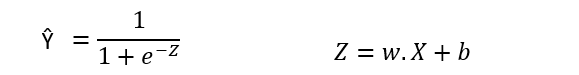

Y_hat --> predicted value

X --> input variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α * dw

b  =  b - α * db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

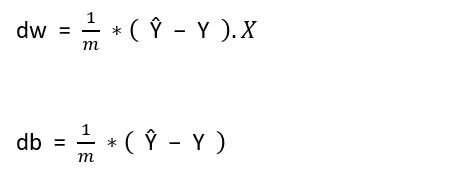

These are the derivates used to update the gradient descent algorithm of logistic regression.

In [2]:
import numpy as np
import pandas as pd

In [32]:
class LogisticRegression():
    """
    Logistic Regression model for binary classification.

    This model uses the logistic (sigmoid) function to model the probability
    that a given input belongs to class 1. Training is done using gradient descent
    to minimize the binary cross-entropy loss.
    """

    # Declaring hyperparameters 
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    
    def sigmoid(self, z):
        """ Applies the sigmoid function element-wise. """
        
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        """ Initializes weights and bias to zero. """
        
        self.weights = np.zeros(n_features)
        self.bias = 0.0

    def forward(self, X):
        """ Performs forward propagation to compute predictions. """
        
        Z = np.dot(X, self.weights) + self.bias # linear combination
        return self.sigmoid(Z)

    def cost_function(self, predictions, y):
        """ Computes the binary cross entroy cost. """
        
        m = y.shape[0]
        epsilon = 1e-8 # to avoid division by 0 or log(0)
        cost = -np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
        return cost / m

    def compute_gradients(self, x, y, predictions):
        """ Computes gradients of weights and bias. """

        m = x.shape[0]
        dW = np.dot(x.T, (predictions - y)) / m
        dB = np.sum(predictions - y) / m

        return dW, dB

    # Fit function to train the model 
    def fit(self, x, y, no_of_iterations = 1000):
        """ Trains the logistic regression model using gradient descent. """

        # number of training examples and number of features
        self.m, self.n = x.shape # m = number of examples, n = number of features

        # intializing weight and bias value
        self.initialize_parameters(self.n)
        costs = []

        # implementing Gradient Descent
        for i in range(no_of_iterations):
            predictions = self.forward(x)
            cost = self.cost_function(predictions, y)
            dW, dB = self.compute_gradients(x, y, predictions)

            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")
                costs.append(cost)

    def predict_prob(self, x):
        """ Predicts probabilities using learned parameters. """

        return self.forward(x)

    def predict(self, x):
        """ Predicts binary labels using 0.5 threshold. """

        prob = self.predict_prob(x)
        return np.where(prob >= 0.5, 1, 0)


### Let's check this model on a dataset

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_csv('Datasets/diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.shape

(768, 9)

In [11]:
# Statistical measures
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Target column count
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
features = data.drop(columns = 'Outcome', axis=1)
target = data['Outcome']

In [16]:
# Data Standardization

scaler = StandardScaler()

scaler.fit(features)
std_data = scaler.transform(features)

In [17]:
# Training and Testing split

X_train, X_test, Y_train, Y_test = train_test_split(std_data, target, test_size = 0.3, random_state = 42)

In [19]:
print(std_data.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [33]:
# Training the Logistic Regression Model

logistic_reg = LogisticRegression(learning_rate = 0.01)

In [34]:
logistic_reg.fit(X_train, Y_train)

Iteration 0: Cost = 0.693147
Iteration 100: Cost = 0.597741
Iteration 200: Cost = 0.550807
Iteration 300: Cost = 0.524284
Iteration 400: Cost = 0.507650
Iteration 500: Cost = 0.496433
Iteration 600: Cost = 0.488473
Iteration 700: Cost = 0.482612
Iteration 800: Cost = 0.478175
Iteration 900: Cost = 0.474745


In [37]:
# Model prediction

X_train_pred = logistic_reg.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)

In [39]:
print('Training data accuracy: ', training_data_accuracy)

Training data accuracy:  0.7783985102420856


In [40]:
X_test_prediction = logistic_reg.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [41]:
print("Testing data accuracy: ", testing_data_accuracy)

Testing data accuracy:  0.7316017316017316
